In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from pathlib import Path
import cv2
import time
import random
from PIL import Image 

import torch
import torch.nn as nn
import torch.optim as optim

from torch.optim import lr_scheduler
import torchvision
from keras import utils
from torchvision import datasets, transforms
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionResNetV2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("All Libraries Imported Successfully")

All Libraries Imported Successfully


In [32]:
data_dir= '/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification'

In [33]:
train_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [34]:
vald_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [35]:
for images,lables in train_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [36]:
for images,lables in vald_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [37]:
classes=train_data.class_names
print(classes)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [38]:
def normalize(image, label):
  return image/255.0, label

train_data = train_data.map(normalize)

In [39]:
vald_data= vald_data.map(normalize)

In [40]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)
   print(type(train_y))
train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [41]:
print(train_y)
type(train_y)

tf.Tensor([2 7 0 ... 8 4 2], shape=(1017,), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

In [42]:
train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [43]:
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [44]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

In [45]:
num_classes = 10
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

In [46]:
model = Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 60)   │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 60)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 120)  │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 461280)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │    18,451,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,554,752 (211.92 MB)

 Trainable params: 18,518,250 (70.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,036,502 (141.28 MB)

In [47]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_x, train_y, batch_size=10, epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.1459 - loss: 3.6538
Epoch 2/10
  3/102 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2444 - loss: 2.1853

I0000 00:00:1730841212.614846     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 64 bytes spill stores, 64 bytes spill loads



102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.2016 - loss: 2.2193
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3965 - loss: 1.7964
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7131 - loss: 1.0635
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8239 - loss: 0.6389
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9033 - loss: 0.3788
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9617 - loss: 0.2268
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9578 - loss: 0.1826
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9615 - loss: 0.3173
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9830 - loss: 0.1373


In [49]:
train_loss, train_accuracy = model.evaluate(train_x,train_y, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(val_x,val_y, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.41%
Test Accuracy: 99.12%


In [50]:
CLASSES = np.array(class_names)

preds = model.predict(val_x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [51]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(val_y, axis=-1)]

In [69]:
def display_preds_act(n=10, figsize=(15, 3)):
    indices = np.random.choice(range(len(val_x)), n)  # Sample from images, not labels
    
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, idx in enumerate(indices):
        img = val_x[idx]  # Retrieve the image data
        ax = fig.add_subplot(1, n, i + 1)
        ax.axis("off")
        ax.text(0.5, -0.35, "pred = " + str(preds_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.text(0.5, -0.7, "act = " + str(actual_single[idx].split(" ")[0][:4]), fontsize=10, ha="center", transform=ax.transAxes)
        ax.imshow(img)  # Display the image
    
    plt.show()


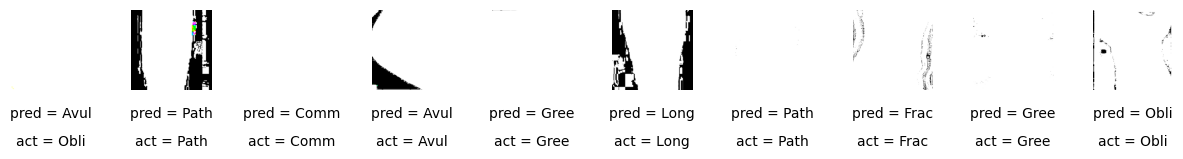

In [70]:
display_preds_act(n=10)

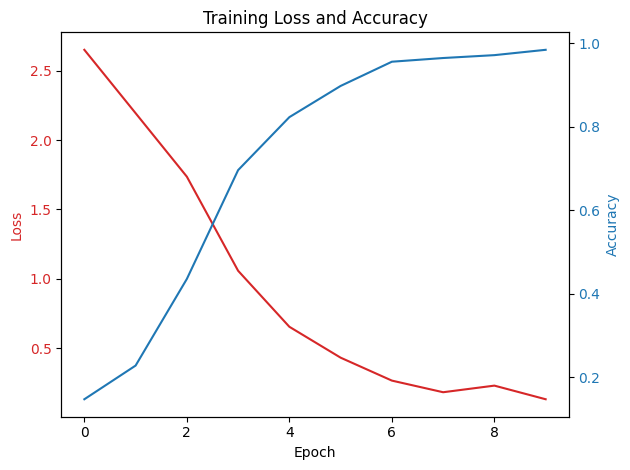

In [54]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(history.history['loss'], color='tab:red', label='Train Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(history.history['accuracy'], color='tab:blue', label='Train Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Training Loss and Accuracy')
fig.tight_layout()
plt.show()

In [55]:
y_pred = model.predict(val_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(val_y, axis=1)

class_names = [
    'Avulsion fracture', 
    'Comminuted fracture', 
    'Fracture Dislocation',
    'Greenstick fracture',
    'Hairline Fracture',
    'Impacted fracture',
    'Longitudinal fracture',
    'Oblique fracture',
    'Pathological fracture',
    'Spiral Fracture'
]

report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.99      0.99      0.99       109
  Comminuted fracture       0.98      1.00      0.99       127
 Fracture Dislocation       1.00      1.00      1.00       146
  Greenstick fracture       1.00      0.99      1.00       112
    Hairline Fracture       1.00      0.99      1.00       102
    Impacted fracture       0.95      1.00      0.97        76
Longitudinal fracture       0.99      0.99      0.99        76
     Oblique fracture       1.00      0.99      0.99        75
Pathological fracture       0.99      1.00      1.00       115
      Spiral Fracture       1.00      0.95      0.97        79

             accuracy                           0.99      1017
            macro avg       0.99      0.99      0.99      1017
         weighted avg       0.99      0.99      0.99      1017



In [56]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate per-class metrics
precision1 = precision_score(y_true_classes, y_pred_classes, average=None)
recall1 = recall_score(y_true_classes, y_pred_classes, average=None)
f11 = f1_score(y_true_classes, y_pred_classes, average=None)
mcc1 = matthews_corrcoef(y_true_classes, y_pred_classes)
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)

# For specificity, we need to compute it manually
specificity1 = []
for i in range(conf_matrix.shape[0]):
    # True Negatives: sum all elements except the ith row and ith column
    tn = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    # False Positives: sum the ith column except the diagonal
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    # False Negatives: sum the ith row except the diagonal
    fn = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
    # True Positives: diagonal element
    tp = conf_matrix[i, i]
    specificity1.append(tn / (tn + fp))
print(f"Precision per class: {precision1}")
print(f"Recall per class: {recall1}")
print(f"F1 Score per class: {f11}")
print(f"Specificity per class: {specificity1}")
print(f"Cohen's Kappa Score: {kappa}")
print(f"Matthews Correlation Coefficient (MCC): {mcc1}")

    

Precision per class: [0.99082569 0.98449612 1.         1.         1.         0.95
 0.98684211 1.         0.99137931 1.        ]
Recall per class: [0.99082569 1.         1.         0.99107143 0.99019608 1.
 0.98684211 0.98666667 1.         0.94936709]
F1 Score per class: [0.99082569 0.9921875  1.         0.9955157  0.99507389 0.97435897
 0.98684211 0.99328859 0.995671   0.97402597]
Specificity per class: [0.998898678414097, 0.9977528089887641, 1.0, 1.0, 1.0, 0.9957492029755579, 0.9989373007438895, 1.0, 0.9988913525498891, 1.0]
Cohen's Kappa Score: 0.9901081158192334
Matthews Correlation Coefficient (MCC): 0.9901295214694694


In [57]:
print(conf_matrix)

[[108   1   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 111   0   1   0   0   0   0]
 [  0   0   0   0 101   0   0   0   1   0]
 [  0   0   0   0   0  76   0   0   0   0]
 [  0   0   0   0   0   1  75   0   0   0]
 [  1   0   0   0   0   0   0  74   0   0]
 [  0   0   0   0   0   0   0   0 115   0]
 [  0   1   0   0   0   2   1   0   0  75]]


In [58]:
class_names_dict = {
    0: 'Avulsion fracture', 
    1: 'Comminuted fracture', 
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'Oblique fracture',
    8: 'Pathological fracture',
    9: 'Spiral Fracture'
}

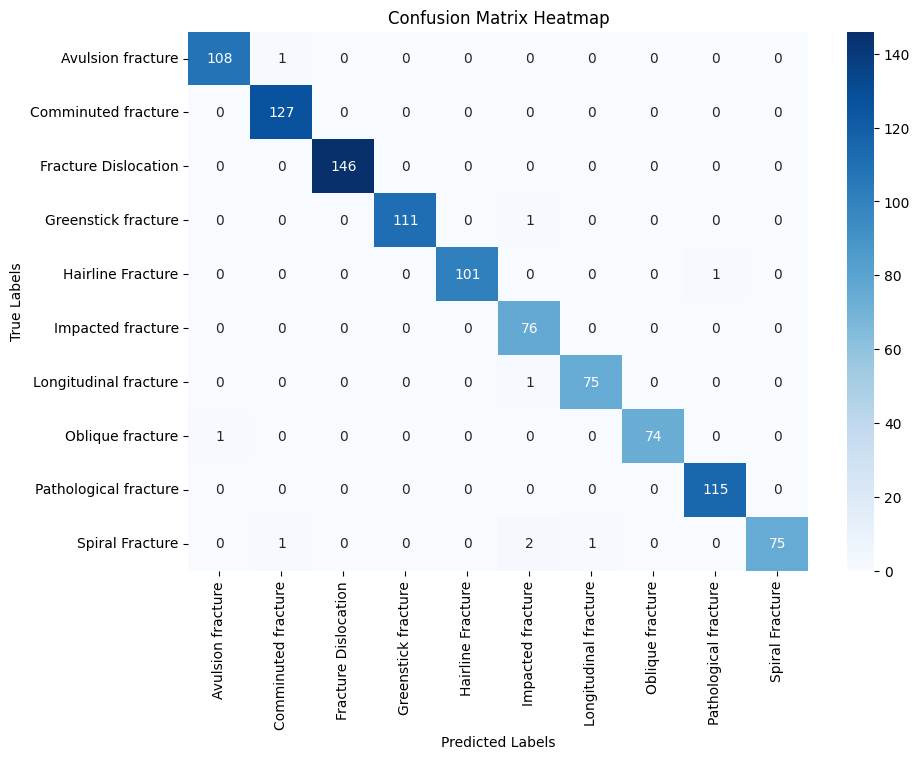

In [59]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(class_names_dict.values()),
            yticklabels=list(class_names_dict.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [60]:
model.save("BONE NET V2.h5")